First 5 rows of dataset:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated

C:\Windows\System32\config\systemprofile\AppData\Local\Temp\ipykernel_11352\933856671.py:81: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



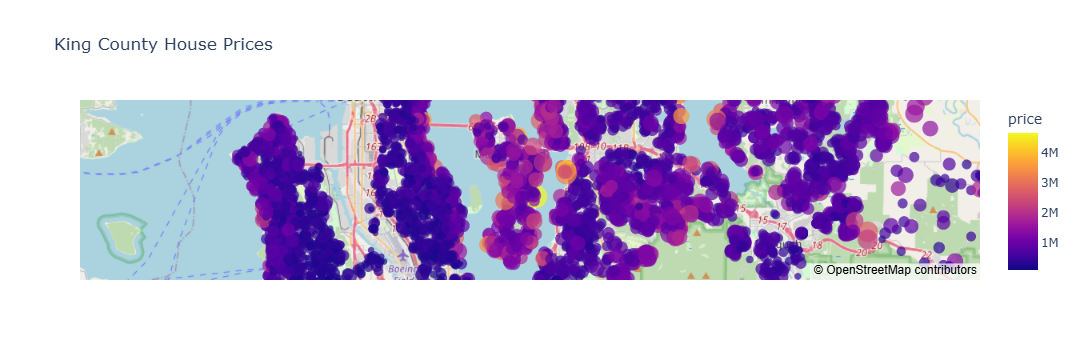

Unique Bedrooms: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(33)]
Unique Bathrooms: [np.float64(0.0), np.float64(0.5), np.float64(0.75), np.float64(1.0), np.float64(1.25), np.float64(1.5), np.float64(1.75), np.float64(2.0), np.float64(2.25), np.float64(2.5), np.float64(2.75), np.float64(3.0), np.float64(3.25), np.float64(3.5), np.float64(3.75), np.float64(4.0), np.float64(4.25), np.float64(4.5), np.float64(4.75), np.float64(5.0), np.float64(5.25), np.float64(5.5), np.float64(5.75), np.float64(6.0), np.float64(6.25), np.float64(6.5), np.float64(6.75), np.float64(7.5), np.float64(8.0)]
Unique Zipcodes: [np.int64(98001), np.int64(98002), np.int64(98003), np.int64(98004), np.int64(98005), np.int64(98006), np.int64(98007), np.int64(98008), np.int64(98010), np.int64(98011), np.int64(98014), np.int64(98019), np.int64(98022), np.int64(98023), np.int64(98024), np.int64(980

In [16]:

# -----------------------------
# Cell 1: Imports & Folder Setup
# -----------------------------
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Create folders if they don't exist (for cleaned data and outputs)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("outputs/maps", exist_ok=True)

# -----------------------------
# Cell 2: Load and Inspect CSV
# -----------------------------
# Load raw King County dataset
df = pd.read_csv("kc_house_data.csv")

# Inspect first few rows
print("First 5 rows of dataset:")
print(df.head())

# Check dataset info
print("\nDataset info:")
print(df.info())

# Quick statistical summary
print("\nSummary statistics:")
print(df.describe())

# -----------------------------
# Cell 3: Data Cleaning
# -----------------------------
# Remove rows with zero price or missing coordinates
df = df[df['price'] > 0]
df = df[df['lat'].notnull() & df['long'].notnull()]

# Remove extreme outliers (optional)
df = df[df['price'] < 5000000]

# Save cleaned CSV for future use and Streamlit dashboard
df.to_csv("data/processed/cleaned_house_prices.csv", index=False)
print("\nCleaned CSV saved at: data/processed/cleaned_house_prices.csv")
print(f"Remaining rows: {len(df)}")

# -----------------------------
# Cell 4: Create GeoDataFrame
# -----------------------------
# Convert DataFrame to GeoDataFrame for geospatial analysis
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Save GeoJSON for mapping & geospatial libraries
gdf.to_file("data/processed/cleaned_house_prices.geojson", driver="GeoJSON")
print("GeoJSON created at: data/processed/cleaned_house_prices.geojson")

# -----------------------------
# Cell 5: Folium Heatmap
# -----------------------------
# Create an interactive heatmap to visualize house price hotspots
m = folium.Map(location=[47.6, -122.3], zoom_start=10)  # Centered around Seattle

# Prepare data for heatmap: lat, long, and price
heat_data = [[row['lat'], row['long'], row['price']] for idx, row in df.iterrows()]

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15).add_to(m)

# Save heatmap as HTML
map_path = "outputs/maps/price_heatmap.html"
m.save(map_path)
print(f"Heatmap saved at: {map_path}")

# -----------------------------
# Cell 6: Plotly Scatter Map
# -----------------------------
# Interactive scatter map for visual exploration
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="long",
                        color="price",           # Color by price
                        size="sqft_living",      # Marker size by living area
                        hover_name="zipcode",    # Hover info: ZIP code
                        zoom=10,
                        mapbox_style="open-street-map",
                        title="King County House Prices")

# Show map in notebook
fig.show()

# -----------------------------
# Cell 7: Data Summary & Filter Options
# -----------------------------
# Check unique values for potential Streamlit filters
print("Unique Bedrooms:", sorted(df['bedrooms'].unique()))
print("Unique Bathrooms:", sorted(df['bathrooms'].unique()))
print("Unique Zipcodes:", sorted(df['zipcode'].unique()))

# -----------------------------
# Cell 8: Basic Statistics / KPIs
# -----------------------------
# Calculate key metrics
average_price = df['price'].mean()
median_price = df['price'].median()
total_listings = len(df)

print(f"\nKey Metrics:")
print(f"Average Price: ${average_price:,.2f}")
print(f"Median Price: ${median_price:,.2f}")
print(f"Total Listings: {total_listings}")
